In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load the Loan Prediction dataset:
df = pd.read_csv('lab2_LoanPrediction.csv')
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,CreditHistory,PropertyArea,Loan_Status
0,5849,0.0,146,1.0,Urban,Y
1,4583,1508.0,128,1.0,Rural,N
2,3000,0.0,66,1.0,Urban,Y
3,2583,2358.0,120,1.0,Urban,Y
4,6000,0.0,141,1.0,Urban,Y
...,...,...,...,...,...,...
609,2900,0.0,71,1.0,Rural,Y
610,4106,0.0,40,1.0,Rural,Y
611,8072,240.0,253,1.0,Urban,Y
612,7583,0.0,187,1.0,Urban,Y


In [4]:
# Create a new DataFrame containing only the following columns: ApplicantIncome, LoanAmount, and Loan_Status.
df_new = df[['ApplicantIncome', 'LoanAmount', 'Loan_Status']]
print(df_new.head())

   ApplicantIncome  LoanAmount Loan_Status
0             5849         146           Y
1             4583         128           N
2             3000          66           Y
3             2583         120           Y
4             6000         141           Y


In [6]:
# handle missing values
df_new['LoanAmount'].fillna(df_new['LoanAmount'].median(), inplace=True)
df_new['Loan_Status'].fillna(df_new['Loan_Status'].mode()[0], inplace=True)
df_new

/var/folders/q8/jq2qqhms2y18nl_r3vs5007r0000gn/T/ipykernel_5845/1488524678.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['LoanAmount'].fillna(df_new['LoanAmount'].median(), inplace=True)
/var/folders/q8/jq2qqhms2y18nl_r3vs5007r0000gn/T/ipykernel_5845/1488524678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['LoanAmount

,ApplicantIncome,LoanAmount,Loan_Status
0,5849,146,Y
1,4583,128,N
2,3000,66,Y
3,2583,120,Y
4,6000,141,Y
...,...,...,...
609,2900,71,Y
610,4106,40,Y
611,8072,253,Y
612,7583,187,Y


# Task 1: Use Pandas to Groupby and Summarize
- Group the data by Loan_Status and calculate the average LoanAmount for approved and non-approved loans.

In [7]:
loan_group = df_new.groupby('Loan_Status').mean()
print(loan_group)

             ApplicantIncome  LoanAmount
Loan_Status                             
N                5446.078125  150.921875
Y                5384.068720  144.338863


# Task 2: Matplotlib visualizations
- Create a bar plot to compare the average LoanAmount and ApplicantIncome for approved and non-approved loans.

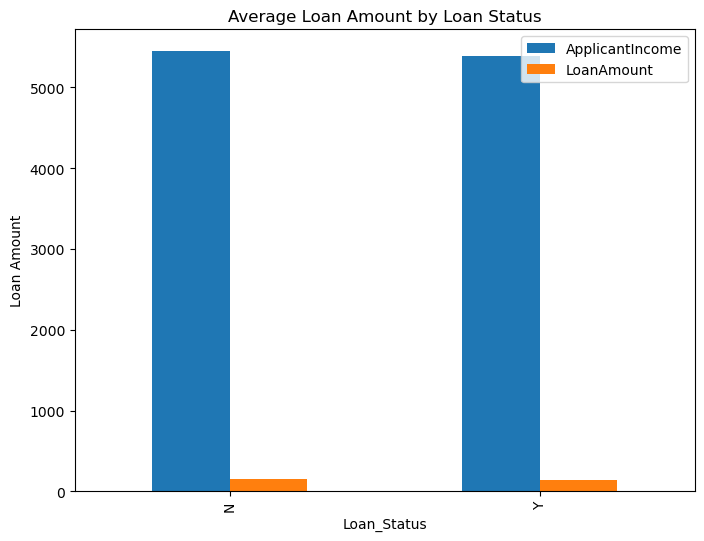

In [8]:
loan_group = df_new.groupby('Loan_Status').mean()

loan_group.plot(kind='bar', figsize=(8,6))
plt.title('Average Loan Amount by Loan Status')
plt.ylabel('Loan Amount')
plt.show()

# Task 3: Seaborn
- Plot a histogram of the ApplicantIncome column and visualize the distribution of incomes.

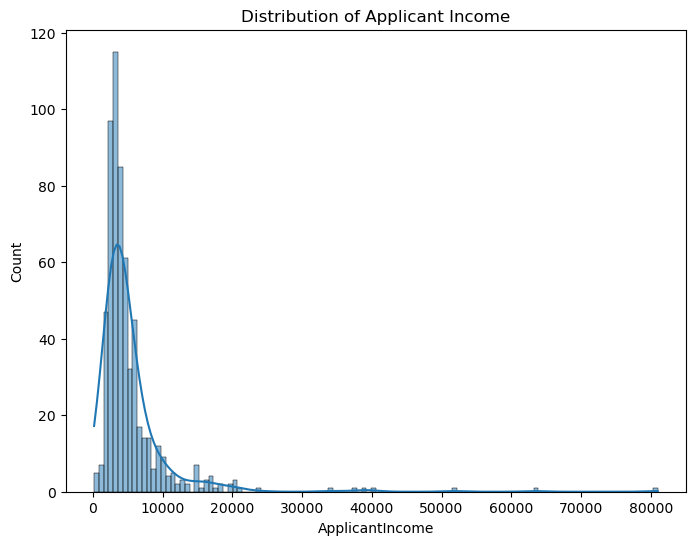

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.show()

# Task 4: Plotly
- Create an interactive scatter plot to visualize the relationship between ApplicantIncome and LoanAmount.

In [10]:
fig = px.scatter(df, x='ApplicantIncome', y='LoanAmount', color='Loan_Status',
                 title='Applicant Income vs Loan Amount')
fig.show()

/opt/homebrew/Caskroom/miniforge/base/envs/envp3t/lib/python3.10/site-packages/plotly/express/_core.py:1980: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


# Task 5: 
- Sub-task1: Visualize Missing Data
    - Use seaborn heatmap to visualize the missing values in the dataset.

- Sub-task2: Impute missing data
    - Drop rows with missing values in the CreditHistory column.

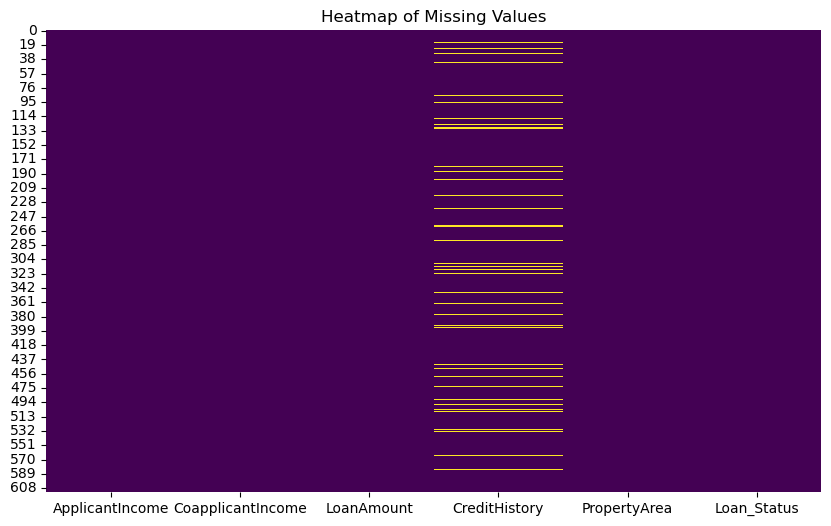

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

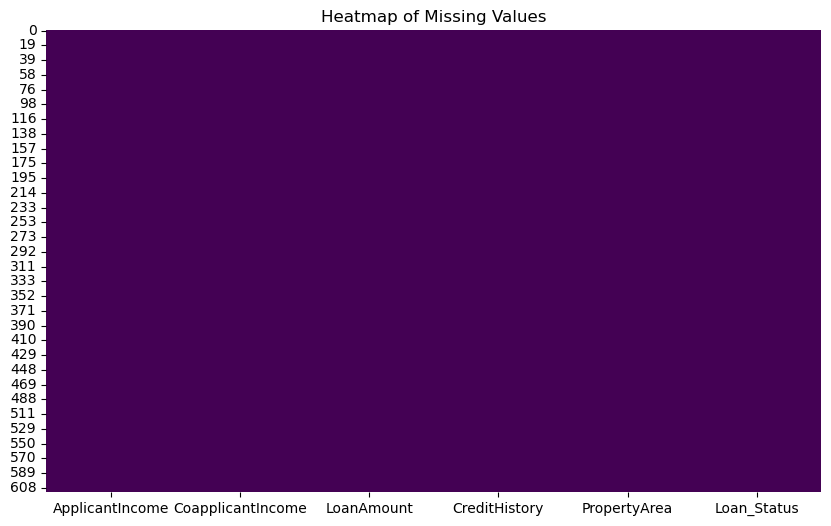

In [15]:
df.dropna(subset=['CreditHistory'], inplace=True)

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

# Task 6: Aggregation techniques
- Subtask1: Pivot Table:
    - Create a pivot table to analyze the average LoanAmount by PropertyArea and Loan_Status.
- Subtask2: Groupby:
    - Group the data by PropertyArea and calculate the median LoanAmount.

In [20]:
pivot_table = pd.pivot_table(df, values='LoanAmount', index='PropertyArea', 
                             columns='Loan_Status', aggfunc=np.mean)
print(pivot_table)

Loan_Status            N           Y
PropertyArea                        
Rural         161.030769  148.950000
Semiurban     151.183673  143.476190
Urban         134.953846  138.487179


/var/folders/q8/jq2qqhms2y18nl_r3vs5007r0000gn/T/ipykernel_5845/3045944459.py:1: FutureWarning:

The provided callable <function mean at 0x1062d2440> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [21]:
property_group = df.groupby('PropertyArea')['LoanAmount'].median()
print(property_group)

PropertyArea
Rural        135.0
Semiurban    128.0
Urban        122.5
Name: LoanAmount, dtype: float64


# Task 7: Advanced Plotting with Matplotlib and Seaborn
- Use matplotlib to create subplots showing:
    - A line plot for the average ApplicantIncome by Loan_Status.
    - A bar plot for the count of loans by PropertyArea

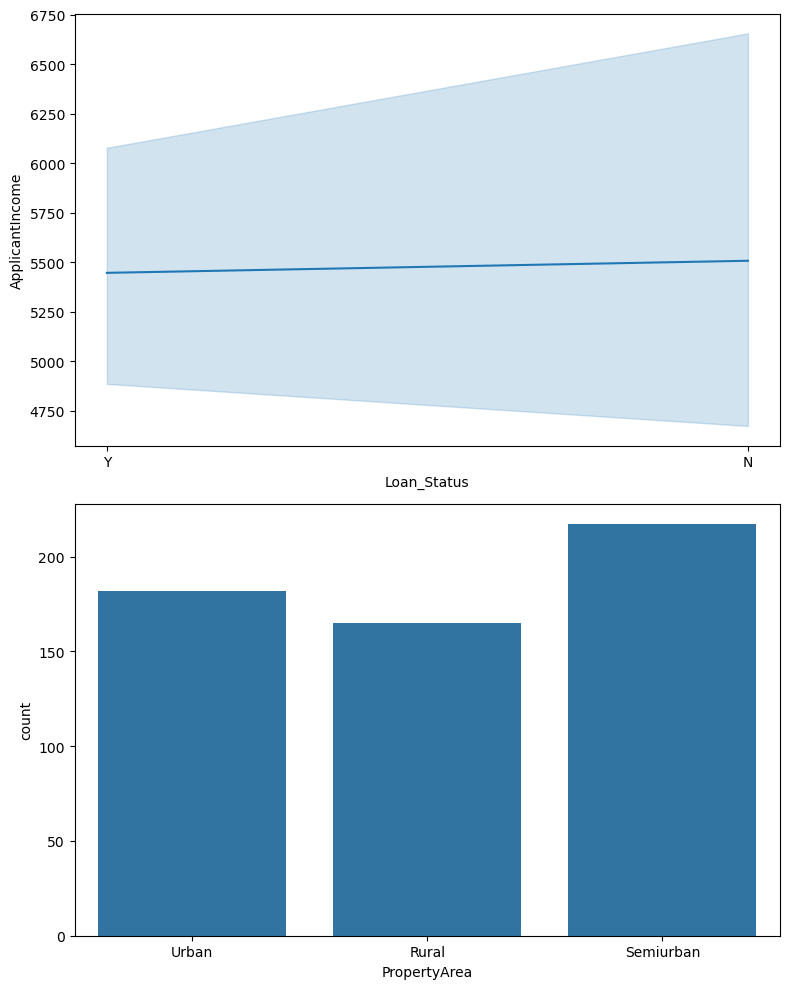

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

sns.lineplot(data=df, x='Loan_Status', y='ApplicantIncome', ax=ax[0])
sns.countplot(data=df, x='PropertyArea', ax=ax[1])

plt.tight_layout()
plt.show()